# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 4 - Aprendizaje No Supervisado

# Introducción

En finanzas, encontrar grupos de activos similares o regímenes en el comportamiento de los precios es de mucha utilidad, y es de gran ayuda en el desarrollo de filtros, definición de reglas de compra/venta, etc. 

En este práctico aplicaremos métodos de aprendizaje no supervisado. Estas metodologías en muchos casos son aplicadas antes de las de aprendizaje supervisado, dado que frecuentemente nos permiten obtener información útil de nuestros datos.

Podemos destacar métodos como clustering y reducción de dimensionalidad. Algunas de las metodologías despliegan su máximo potencial cuando se dispone de grandes cantidades de datos (activos en nuestro caso).

# 📖 ¡Actividades!

Analizaremos las variaciones (tasas de cambio) de los activos en ventanas específicas de tiempo. Nuestro objetivo será encontrar activos con comportamiento similiar en término de sus retornos.

Para esta actividad seleccionen periodos en los cuales esté disponible la data de todos los activos. 

## Parte I 

Una forma sencilla de predecir el comportamiento de los activos sería suponer que todos siguen el mismo modelo de aprendizaje automático y crear este modelo global para predecir los rendimientos de todos los activos. Sin embargo, es posible que ellos reaccionen de manera diferente a un conjunto de indicadores técnicos. Una forma de resolver este problema es crear un modelo diferente para grupos de activos que se espera que se comporten de manera similar.

Evaluen los siguientes algoritmos de clusterización. 

- Mean Shift.
- k-means. 
- Clustering Jerárquico 

¿Qué activos forman parte de cada cluster? ¿Encuentran alguna relación dentro de cada grupo?

## Parte II 

- Usar la medida de distancia dynamic time warping para agrupar por k-means y comparar con lo obtenido con la métrica euclídea ([link](https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3)). Comente los resultados.

## Opcional 

- Aplicar factores dinámicos para ver si las tasas de retorno se pueden resumir en uno o unos pocos constructos subyacentes ([link](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_dfm_coincident.html))

# Fecha de entrega

- __Versión preliminar: 12/9__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

#clusters
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [2]:
df = pd.read_csv('../2tp_analisisYCuracion/Activos limpios con features - 2tp - Final.csv',index_col='Fecha')

In [3]:
df

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 11:00:00,30.09000,31.00000,29.91000,30.84000,2.099238e+05,AXSUSDT,2,5,2022,Monday,...,5.405922,27.455252,35.588711,-1.980730,31.0060,31.412000,1.013094,1.690649e+05,2.517633e+05,0.671523
2022-05-02 11:00:00,38711.87000,39155.47000,38242.51000,38840.00000,1.745554e+04,BTCUSDT,2,5,2022,Monday,...,4.968616,76.953079,77.404507,-137.983866,38681.2480,38350.076667,0.991438,8.922673e+03,7.053100e+03,1.265071
2022-05-02 11:00:00,2.07100,2.10900,2.03400,2.09400,3.760029e+06,EOSUSDT,2,5,2022,Monday,...,6.256037,48.181818,56.219706,-0.055727,2.0912,2.109800,1.008894,2.650436e+06,2.843629e+06,0.932061


In [4]:
df.insert(5,'rend',(df['open']-df['close'])/df['open']*100)

In [5]:
df

,open,high,low,close,volume,rend,active,day,month,year,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,-1.250000,XRPUSDT,1,1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,-2.019584,ETHUSDT,1,1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,-0.702214,EOSUSDT,1,1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,-1.830491,ADAUSDT,1,1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,-1.311806,LTCUSDT,1,1,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 11:00:00,30.09000,31.00000,29.91000,30.84000,2.099238e+05,-2.492522,AXSUSDT,2,5,2022,...,5.405922,27.455252,35.588711,-1.980730,31.0060,31.412000,1.013094,1.690649e+05,2.517633e+05,0.671523
2022-05-02 11:00:00,38711.87000,39155.47000,38242.51000,38840.00000,1.745554e+04,-0.330984,BTCUSDT,2,5,2022,...,4.968616,76.953079,77.404507,-137.983866,38681.2480,38350.076667,0.991438,8.922673e+03,7.053100e+03,1.265071
2022-05-02 11:00:00,2.07100,2.10900,2.03400,2.09400,3.760029e+06,-1.110575,EOSUSDT,2,5,2022,...,6.256037,48.181818,56.219706,-0.055727,2.0912,2.109800,1.008894,2.650436e+06,2.843629e+06,0.932061


In [6]:
def status(data):

    data2=data 
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    return(d2)

In [7]:
columns_interesting = ['rend','active']
df_filter = df[columns_interesting]
df_filter

,rend,active
Fecha,,
2019-01-01 03:00:00,-1.250000,XRPUSDT
2019-01-01 03:00:00,-2.019584,ETHUSDT
2019-01-01 03:00:00,-0.702214,EOSUSDT
2019-01-01 03:00:00,-1.830491,ADAUSDT
2019-01-01 03:00:00,-1.311806,LTCUSDT
...,...,...
2022-05-02 11:00:00,-2.492522,AXSUSDT
2022-05-02 11:00:00,-0.330984,BTCUSDT
2022-05-02 11:00:00,-1.110575,EOSUSDT


In [8]:
df_filter.index = pd.to_datetime(df_filter.index)
df_filter

,rend,active
Fecha,,
2019-01-01 03:00:00,-1.250000,XRPUSDT
2019-01-01 03:00:00,-2.019584,ETHUSDT
2019-01-01 03:00:00,-0.702214,EOSUSDT
2019-01-01 03:00:00,-1.830491,ADAUSDT
2019-01-01 03:00:00,-1.311806,LTCUSDT
...,...,...
2022-05-02 11:00:00,-2.492522,AXSUSDT
2022-05-02 11:00:00,-0.330984,BTCUSDT
2022-05-02 11:00:00,-1.110575,EOSUSDT


In [9]:
contador = 0
for i in set(df_filter.active):
    aux = df_filter[df_filter.active == i]
    aux2 = aux.resample("d").mean()
    aux2['active'] = i
    if contador == 0:
        df_filter_daily = aux2.copy()
        contador += 1
    else:
        df_filter_daily = pd.concat([df_filter_daily, aux2])
        df_filter_daily = df_filter_daily.dropna()

In [10]:
status(df_filter_daily)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,rend,0,0.0,0,0.0,19392,float64
1,active,0,0.0,0,0.0,19,object


In [11]:

# df_filter_daily_ETH = df_filter_daily[df_filter_daily.active == 'ETHUSDT']
# columns_interesting = ['close','active']
# df_filter_daily_ETH_2 = df_filter_daily_ETH[columns_interesting]
# df_filter_daily_ETH_2

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
contador = 0
for i in set(df_filter_daily.active):
    aux = df_filter_daily[df_filter_daily.active == i]
    aux[['Scalar_rend']] = scaler.fit_transform(aux[["rend"]])
    if contador == 0:
        df_filter_daily_scalar = aux.copy()
        contador += 1
    else:
        df_filter_daily_scalar = pd.concat([df_filter_daily_scalar, aux])
        # df_filter_daily_scalar = df_filter_daily.dropna()

In [13]:
status(df_filter_daily_scalar)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,rend,0,0.0,0,0.00000,19392,float64
1,active,0,0.0,0,0.00000,19,object
2,Scalar_rend,0,0.0,19,0.00098,19358,float64


In [14]:
# df_filter_daily_scalar = df_filter_daily_scalar.reset_index()
df_filter_daily_scalar

,rend,active,Scalar_rend
Fecha,,,
2019-01-01,-0.753079,ADAUSDT,0.322507
2019-01-02,-0.720690,ADAUSDT,0.325034
2019-01-03,0.434108,ADAUSDT,0.415147
2019-01-04,-0.362739,ADAUSDT,0.352966
2019-01-05,-0.873916,ADAUSDT,0.313077
...,...,...,...
2022-04-28,-0.477270,EOSUSDT,0.475831
2022-04-29,0.566023,EOSUSDT,0.541119
2022-04-30,1.631049,EOSUSDT,0.607766


In [15]:
df_filter_daily_scalar = df_filter_daily_scalar.reset_index()
df_filter_daily_scalar

,Fecha,rend,active,Scalar_rend
0,2019-01-01,-0.753079,ADAUSDT,0.322507
1,2019-01-02,-0.720690,ADAUSDT,0.325034
2,2019-01-03,0.434108,ADAUSDT,0.415147
3,2019-01-04,-0.362739,ADAUSDT,0.352966
4,2019-01-05,-0.873916,ADAUSDT,0.313077
...,...,...,...,...
19387,2022-04-28,-0.477270,EOSUSDT,0.475831
19388,2022-04-29,0.566023,EOSUSDT,0.541119
19389,2022-04-30,1.631049,EOSUSDT,0.607766
19390,2022-05-01,-0.493447,EOSUSDT,0.474819


In [16]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar.pivot(index='Fecha', columns='active', values='Scalar_rend')
df_filter_daily_scalar_pivot

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
Fecha,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,0.322507,NaN,NaN,0.415498,0.359719,NaN,NaN,NaN,NaN,0.467486,0.426035,0.356523,NaN,0.377519,NaN,0.362558,NaN,0.459494
2019-01-02,NaN,0.325034,NaN,NaN,0.422867,0.376125,NaN,NaN,NaN,NaN,0.437815,0.456269,0.320293,NaN,0.404999,NaN,0.403187,NaN,0.477719
2019-01-03,NaN,0.415147,NaN,NaN,0.456791,0.424371,NaN,NaN,NaN,NaN,0.567125,0.535183,0.465387,NaN,0.498433,NaN,0.453988,NaN,0.536413
2019-01-04,NaN,0.352966,NaN,NaN,0.400817,0.375458,NaN,NaN,NaN,NaN,0.472454,0.438547,0.341532,NaN,0.389814,NaN,0.409959,NaN,0.486258
2019-01-05,NaN,0.313077,NaN,NaN,0.429921,0.412460,NaN,NaN,NaN,NaN,0.536673,0.499649,0.493509,NaN,0.375463,NaN,0.395390,NaN,0.518686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,0.577591,0.391418,0.619440,0.384315,0.393952,0.391947,0.571882,0.506525,0.890840,0.905346,0.475831,0.484686,0.423458,0.523518,0.406795,0.598048,0.428176,0.396616,0.521632
2022-04-29,0.524090,0.428378,0.683581,0.419721,0.447034,0.426364,0.626989,0.551903,0.884919,0.913451,0.541119,0.525780,0.467717,0.536729,0.480795,0.588327,0.452148,0.489524,0.538017
2022-04-30,0.666914,0.456723,0.723229,0.459415,0.467813,0.428947,0.739130,0.605388,0.896844,0.937728,0.607766,0.590591,0.460324,0.596071,0.522549,0.654931,0.497791,0.393435,0.561535


In [17]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.dropna()

In [18]:
df_filter_daily_scalar_pivot

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
Fecha,,,,,,,,,,,,,,,,,,,
2020-11-04,0.499151,0.338134,0.916540,0.370239,0.391568,0.345802,0.486178,0.506834,0.870829,0.890139,0.485145,0.458790,0.359654,0.476501,0.396206,0.571253,0.424416,0.450035,0.487604
2020-11-05,0.138450,0.285359,0.704780,0.329320,0.392588,0.256567,0.464243,0.462612,0.864403,0.879102,0.463689,0.411090,0.344162,0.443656,0.315090,0.527223,0.376131,0.355568,0.445617
2020-11-06,0.279993,0.264620,0.319741,0.309115,0.396154,0.402827,0.350449,0.494843,0.863590,0.881091,0.467391,0.403093,0.358350,0.368475,0.403087,0.517020,0.320146,0.411403,0.426088
2020-11-07,0.162771,0.489391,0.626868,0.438896,0.465341,0.447705,0.622833,0.578012,0.897016,0.934634,0.529918,0.543827,0.481140,0.592646,0.530215,0.619576,0.495862,0.501995,0.568596
2020-11-08,0.258322,0.346304,0.191486,0.317098,0.405460,0.352561,0.509991,0.510522,0.874851,0.889176,0.500705,0.479193,0.396793,0.472087,0.430182,0.540652,0.399546,0.326328,0.484063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,0.577591,0.391418,0.619440,0.384315,0.393952,0.391947,0.571882,0.506525,0.890840,0.905346,0.475831,0.484686,0.423458,0.523518,0.406795,0.598048,0.428176,0.396616,0.521632
2022-04-29,0.524090,0.428378,0.683581,0.419721,0.447034,0.426364,0.626989,0.551903,0.884919,0.913451,0.541119,0.525780,0.467717,0.536729,0.480795,0.588327,0.452148,0.489524,0.538017
2022-04-30,0.666914,0.456723,0.723229,0.459415,0.467813,0.428947,0.739130,0.605388,0.896844,0.937728,0.607766,0.590591,0.460324,0.596071,0.522549,0.654931,0.497791,0.393435,0.561535


In [19]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.reset_index()

In [20]:
df_filter_daily_scalar_pivot = df_filter_daily_scalar_pivot.loc[:, df_filter_daily_scalar_pivot.columns != 'Fecha']

In [21]:
df_filter_daily_scalar_pivot

active,AAVEUSDT,ADAUSDT,AXSUSDT,BCHUSDT,BNBUSDT,BTCUSDT,COMPUSDT,DASHUSDT,DOGEUSDT,DOTUSDT,EOSUSDT,ETCUSDT,ETHUSDT,LINKUSDT,LTCUSDT,LUNAUSDT,NEOUSDT,XMRUSDT,XRPUSDT
0,0.499151,0.338134,0.916540,0.370239,0.391568,0.345802,0.486178,0.506834,0.870829,0.890139,0.485145,0.458790,0.359654,0.476501,0.396206,0.571253,0.424416,0.450035,0.487604
1,0.138450,0.285359,0.704780,0.329320,0.392588,0.256567,0.464243,0.462612,0.864403,0.879102,0.463689,0.411090,0.344162,0.443656,0.315090,0.527223,0.376131,0.355568,0.445617
2,0.279993,0.264620,0.319741,0.309115,0.396154,0.402827,0.350449,0.494843,0.863590,0.881091,0.467391,0.403093,0.358350,0.368475,0.403087,0.517020,0.320146,0.411403,0.426088
3,0.162771,0.489391,0.626868,0.438896,0.465341,0.447705,0.622833,0.578012,0.897016,0.934634,0.529918,0.543827,0.481140,0.592646,0.530215,0.619576,0.495862,0.501995,0.568596
4,0.258322,0.346304,0.191486,0.317098,0.405460,0.352561,0.509991,0.510522,0.874851,0.889176,0.500705,0.479193,0.396793,0.472087,0.430182,0.540652,0.399546,0.326328,0.484063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.577591,0.391418,0.619440,0.384315,0.393952,0.391947,0.571882,0.506525,0.890840,0.905346,0.475831,0.484686,0.423458,0.523518,0.406795,0.598048,0.428176,0.396616,0.521632
541,0.524090,0.428378,0.683581,0.419721,0.447034,0.426364,0.626989,0.551903,0.884919,0.913451,0.541119,0.525780,0.467717,0.536729,0.480795,0.588327,0.452148,0.489524,0.538017
542,0.666914,0.456723,0.723229,0.459415,0.467813,0.428947,0.739130,0.605388,0.896844,0.937728,0.607766,0.590591,0.460324,0.596071,0.522549,0.654931,0.497791,0.393435,0.561535
543,0.465921,0.339167,0.537970,0.339383,0.400948,0.365172,0.477878,0.471730,0.872613,0.887348,0.474819,0.428692,0.394553,0.498244,0.398443,0.510803,0.358068,0.462874,0.437953


# D.CLUSTERING JERARQUICO

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as  shc

In [23]:
AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

AgglomerativeClustering()

In [24]:
df_CJ = df_filter_daily_scalar_pivot

In [25]:
df_CJ = df_CJ.transpose(copy=False)

In [26]:
df_CJ

,0,1,2,3,4,5,6,7,8,9,...,535,536,537,538,539,540,541,542,543,544
active,,,,,,,,,,,,,,,,,,,,,
AAVEUSDT,0.499151,0.138450,0.279993,0.162771,0.258322,0.456309,0.318652,0.634100,0.454949,0.379916,...,0.525985,0.594957,0.435775,0.483824,0.465842,0.577591,0.524090,0.666914,0.465921,0.512234
ADAUSDT,0.338134,0.285359,0.264620,0.489391,0.346304,0.372529,0.375689,0.389223,0.384377,0.375046,...,0.391358,0.422168,0.342844,0.455581,0.370494,0.391418,0.428378,0.456723,0.339167,0.405288
AXSUSDT,0.916540,0.704780,0.319741,0.626868,0.191486,0.077287,0.622832,0.404285,0.604890,0.400657,...,0.593716,0.637948,0.599683,0.669647,0.612391,0.619440,0.683581,0.723229,0.537970,0.618160
BCHUSDT,0.370239,0.329320,0.309115,0.438896,0.317098,0.395763,0.400820,0.414283,0.348769,0.384552,...,0.404270,0.409205,0.347408,0.423268,0.374301,0.384315,0.419721,0.459415,0.339383,0.382427
BNBUSDT,0.391568,0.392588,0.396154,0.465341,0.405460,0.441379,0.421292,0.440270,0.432575,0.421196,...,0.426798,0.451264,0.400403,0.464752,0.420971,0.393952,0.447034,0.467813,0.400948,0.430254
BTCUSDT,0.345802,0.256567,0.402827,0.447705,0.352561,0.405390,0.391244,0.374023,0.324830,0.416427,...,0.394186,0.412305,0.342805,0.472136,0.358122,0.391947,0.426364,0.428947,0.365172,0.379329
COMPUSDT,0.486178,0.464243,0.350449,0.622833,0.509991,0.556619,0.344737,0.608661,0.514953,0.407070,...,0.545346,0.620988,0.456927,0.647154,0.522816,0.571882,0.626989,0.739130,0.477878,0.536243
DASHUSDT,0.506834,0.462612,0.494843,0.578012,0.510522,0.511076,0.505947,0.470910,0.472187,0.505139,...,0.533191,0.564414,0.508389,0.557659,0.520744,0.506525,0.551903,0.605388,0.471730,0.530912
DOGEUSDT,0.870829,0.864403,0.863590,0.897016,0.874851,0.885426,0.868207,0.881398,0.875337,0.881958,...,0.884359,0.899593,0.806334,0.910293,0.881529,0.890840,0.884919,0.896844,0.872613,0.890032


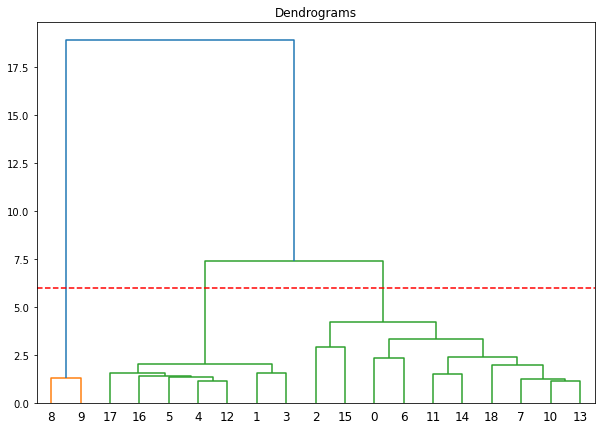

In [27]:
plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")

z = shc.linkage(df_CJ, method='ward')

dend = shc.dendrogram( z )

plt.axhline(y=6, color='r', linestyle='--')

plt.show()

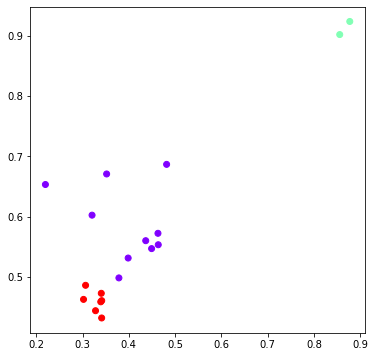

In [28]:
ac2 = AgglomerativeClustering(n_clusters = 3)

#Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_CJ[513], df_CJ[520],
          c = ac2.fit_predict(df_CJ), cmap ='rainbow')
plt.show()

In [29]:
c = ac2.fit_predict(df_CJ)

In [30]:
#El siguiente Array define el cluster al que pertenece cada moneda
c

array([0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0],
      dtype=int64)